In [1]:
from trainers.ResNetTrainer import ExperimentThree
from trainers.ResNetTrainer import ResNetTrainer
import numpy as np
import pandas as pd
import torch 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
if torch.cuda.is_available():
    torch.set_float32_matmul_precision('high')

In [2]:
from datasets.utils_datasets import get_omniglot_loaders
seed = 5
loaders =  get_omniglot_loaders(seed=seed, batch_size_train=128)

Files already downloaded and verified
Files already downloaded and verified


# MNIST

In [3]:
path = 'experiment_3/omniglot'

In [4]:
gr = ExperimentThree()

In [ ]:
gr.conduct_experiment(loaders, path=path)

## FIXED ALPHA

In [5]:
df = pd.read_csv(f'{path}/fixed_alpha.csv')
fixed_alpha = 0.01

In [6]:
groups = df.groupby(['b'])
best_lrs = []
b_values = []
for name, group in groups:
    lr = group.sort_values(by=['mean_loss']).reset_index().at[0, 'lr']
    best_lrs.append(lr)
    b_values.append(name)
assert len(best_lrs) == len(b_values), f'something wrong with selection of best learning rate'
for i in range(0, len(b_values)):
    b = b_values[i]
    lr = best_lrs[i]
    print(f' best learning rate for beta: {b} is lr: {lr}')

 best learning rate for beta: (0.1,) is lr: 0.003
 best learning rate for beta: (1.0,) is lr: 0.0003
 best learning rate for beta: (10.0,) is lr: 0.0003


lr: 0.003, b: (0.1,)


  0%|          | 0/200 [00:00<?, ?it/s]

Early stopping at epoch: 86
lr: 0.0003, b: (1.0,)


  0%|          | 0/200 [00:00<?, ?it/s]

Early stopping at epoch: 181
lr: 0.0003, b: (10.0,)


  0%|          | 0/200 [00:00<?, ?it/s]

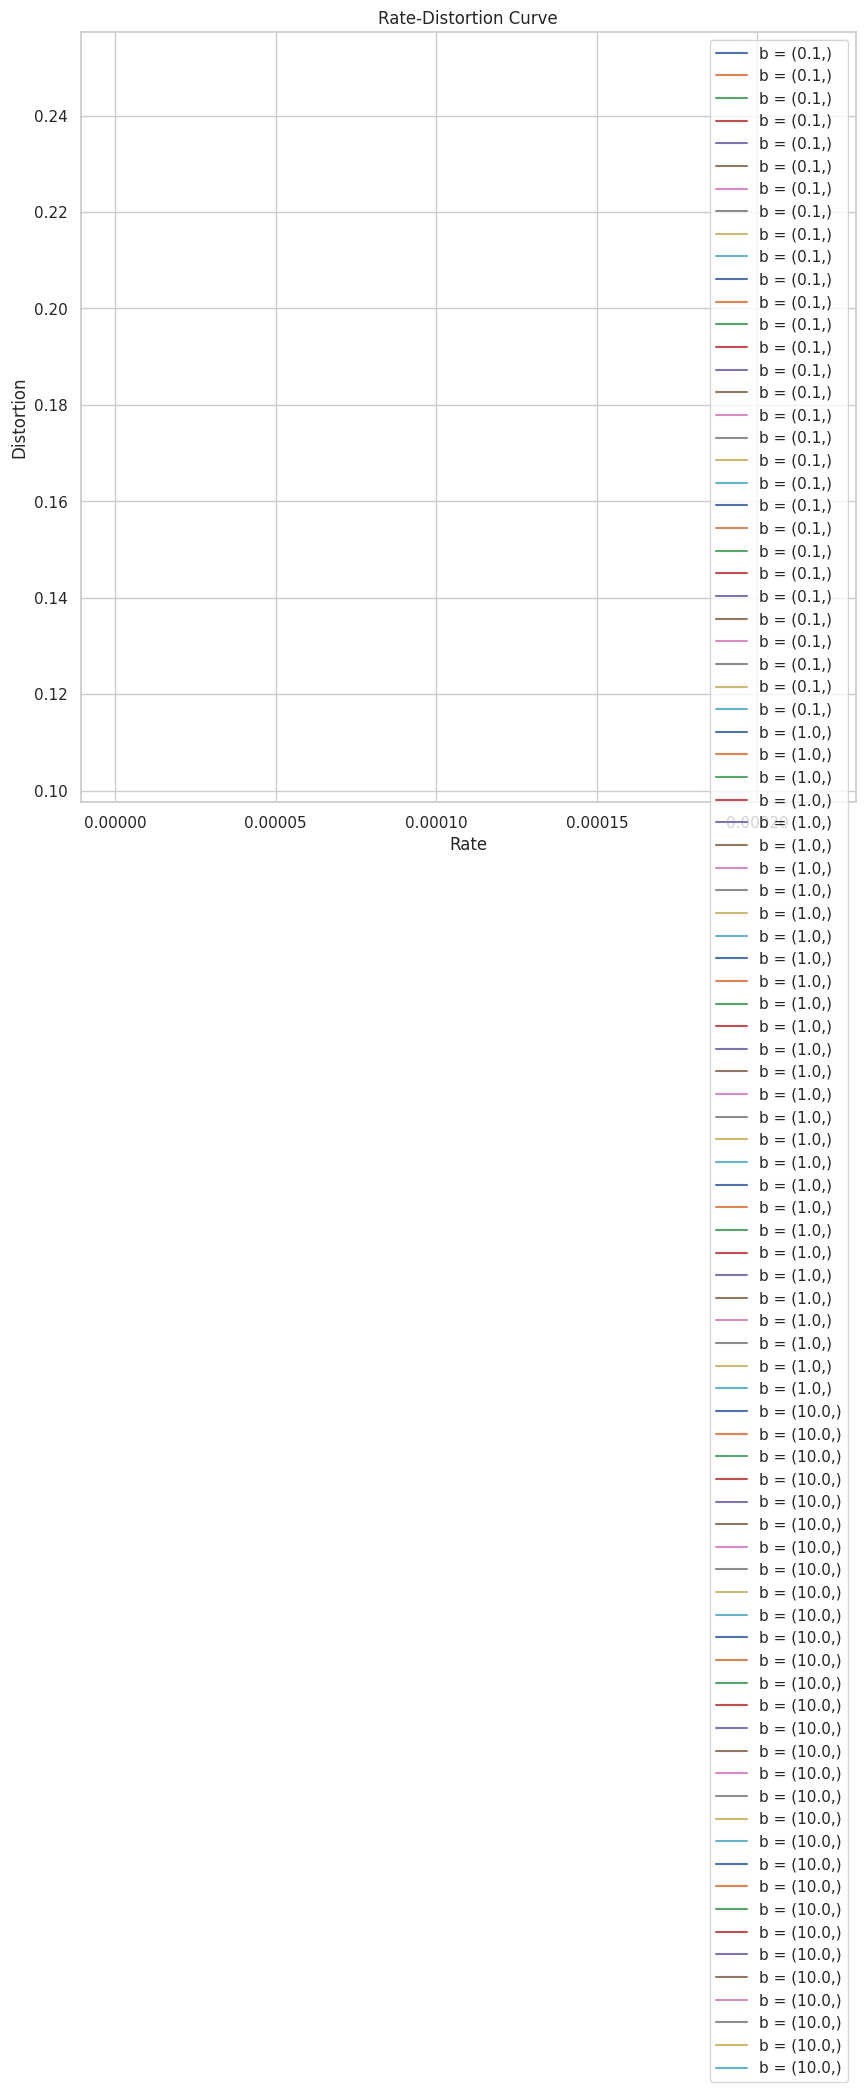

In [8]:
fig = plt.figure(figsize=(10, 10))
for lr, b in zip(best_lrs, b_values):
    print(f'lr: {lr}, b: {b}')
    trainer = ResNetTrainer(loaders, lr=lr, b=b[0], a=fixed_alpha)
    trainer.train()
    label = f'b = {b[0]}'
    for el in np.linspace(np.log(fixed_alpha), np.log(b[0]), 30):
        _, (rate_losses, dist_losses) = trainer.rate_distortion_curve_value(el, None)
        plt.plot(rate_losses, dist_losses, label=label)

plt.legend()
plt.xlabel('Rate')
plt.ylabel('Distortion')
plt.title('Rate-Distortion Curve')
try:
    plt.savefig(f'{path}/rate_distortion_curve_fixed_beta.pdf')
except:
    print('could not save figure')
    pass
plt.show()

## FIXED BETA

In [9]:
df : pd.DataFrame= pd.read_csv(f'{path}/fixed_beta.csv')
fixed_beta = 10.

In [10]:
groups = df.groupby(['a'])
best_lrs = []
a_values = []
for name, group in groups:
    lr = group.sort_values(by=['mean_loss']).reset_index().at[0, 'lr']
    best_lrs.append(lr) 
    a_values.append(name)
assert len(best_lrs) == len(a_values), f'something wrong with selection of best learning rate'
for i in range(0, len(a_values)):
    a = a_values[i]
    lr = best_lrs[i]
    print(f' best learning rate for a: {a} is lr: {lr}')

 best learning rate for a: (0.001,) is lr: 0.0003
 best learning rate for a: (0.01,) is lr: 0.0003
 best learning rate for a: (0.1,) is lr: 0.0003
 best learning rate for a: (1.0,) is lr: 0.0003


In [11]:
fig = plt.figure(figsize=(10, 10))
for lr, a in zip(best_lrs, a_values):
    trainer = ResNetTrainer(loaders, lr=lr, b=fixed_beta, a=a[0])
    trainer.train()
    label = f'a = {a}'
    for el in np.linspace(np.log(a[0]), np.log(fixed_beta), 30):
        _, (rate_losses, dist_losses) = trainer.rate_distortion_curve_value(el, None)
        plt.plot(rate_losses, dist_losses, label=label)

plt.legend()
plt.xlabel('Rate')
plt.ylabel('Distortion')
plt.title('Rate-Distortion Curve')
try:
    plt.savefig(f'{path}/rate_distortion_curve_fixed_alpha.pdf')
except:
    print('could not save figure')
    pass
plt.show()

  0%|          | 0/200 [00:00<?, ?it/s]